# Lab3.4 Training an emotion classifier with a bag-of-words

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

The goal of this notebook is to show how you can create a classifier that can detect emotions in conversations using the scikit-learn package. Overall, we follow the recipe used for the sentiment classification from the previous notebook 3.3 but the data is in a different format and we use emotion labels instead of sentiment.

For the training data, we are going to use data that is produced in the MELD project. MELD stands for Multimodal Emotion Lines Dataset, which is a data set with 13,000 utterances from 1,433 dialogues of the TV-series Friends. Each utterance is annotated with emotion and sentiment labels, and encompasses audio, visual, and textual modalities. The data set is available at:  http:// affective-meld.github.io but the text part of the data has been included here in the data folder. The following paper describes the data set in detail:

    S. Poria, D. Hazarika, N. Majumder, G. Naik, E. Cambria, R. Mihalcea. MELD: A Multimodal Multi-Party Dataset for Emotion Recognition in Conversation. ACL 2019: https://arxiv.org/pdf/1810.02508.pdf

The data are labeled with the six basic emotions that Ekman and his team claimed to hold universally across the facial expressions of people from many different cultures:

Ekman, Paul, Wallace V. Friesen, Maureen O'sullivan, Anthony Chan, Irene Diacoyanni-Tarlatzis, Karl Heider, Rainer Krause et al. "Universals and cultural differences in the judgments of facial expressions of emotion." Journal of personality and social psychology 53, no. 4 (1987): 712

<img src="images/ekman-faces.png" width="500" height="600">

The emotions are: anger, disgust, fear, happiness, sadness and surprise.

We assume you have at least studied the previous notebooks in Lab3:

* Lab3.1.ml.basics
* Lab3.2.ml.evaluation
* Lab3.4.ml.sentiment-analysis-with-sklearn

**At the end of this notebook, you will be able to**:
* load the training and test data, i.e., utterances with emotion labels
* analyse the training and test data
* represent the text as Bag-of-Words vectors
* train and evaluate a *Support Vector Machine Classifier*
* save, load and apply the classifier to your own set of texts and for future use

### Table of Contents

* [Section 1: Data on utterances and emotions](#section1)
* [Section 2: Using Pandas to load data](#section2)
* [Section 3: Visualising the data](#section3)
* [Section 4: Representing the text as numerical Bag-of-Words vectors](#section4)
* [Section 5: Training a Suppert Vector Machine classifier](#section5)
* [Section 5.1: Evaluating the performance of a classifier](#section5.1)
* [Section 5.2: Balancing the training data](#section5.2)
* [Section 6: Saving and reusing a classifier](#section8)


The MELD data for this notebook is stored in the so-called CSV form. CSV stands form Comma Separated Values. This is a text format for tables, also an export format of Excel. CSV is often used to store data. We will introduce you to the Pandas package for loading and accessing such data. Pandas is a popular Python package for data.

## 1. Data on utterances and emotions  <a class="anchor" id ="section1"></a> 

We want to train a classifier or machine-learning module with examples of utterances that have been labeled for the emotion that is expressed. The data we are using is taken from the following Github repository:

https://github.com/declare-lab/MELD

The MELD project created this data for multimodal emotion detection in conversations using facial, audio and textual signals. Here we are only going to use the textual data. For convenience, the textual data are also provided in this Lab in the 'data/MELD' folder, where you find three CSV files (Comma Separated Values):

* dev_sent_emo.csv
* test_sent_emo.csv
* train_sent_emo.csv

We explained in class why researchers create separate train, development (dev) and test splits for their data. This allows researchers to experiment with the training data by testing on the development set but report the final performance on the test set. This is to prevent optimising the paramters on the test set. Other researchers can do the same and the test results can be compared because they are from the same unseen test set. In this notebook, we will only consider the train and test set.

You can open these files in this notebook by double cliking on each. The file 'train_sent_emo.csv' will open in a new TAB which looks as follows:

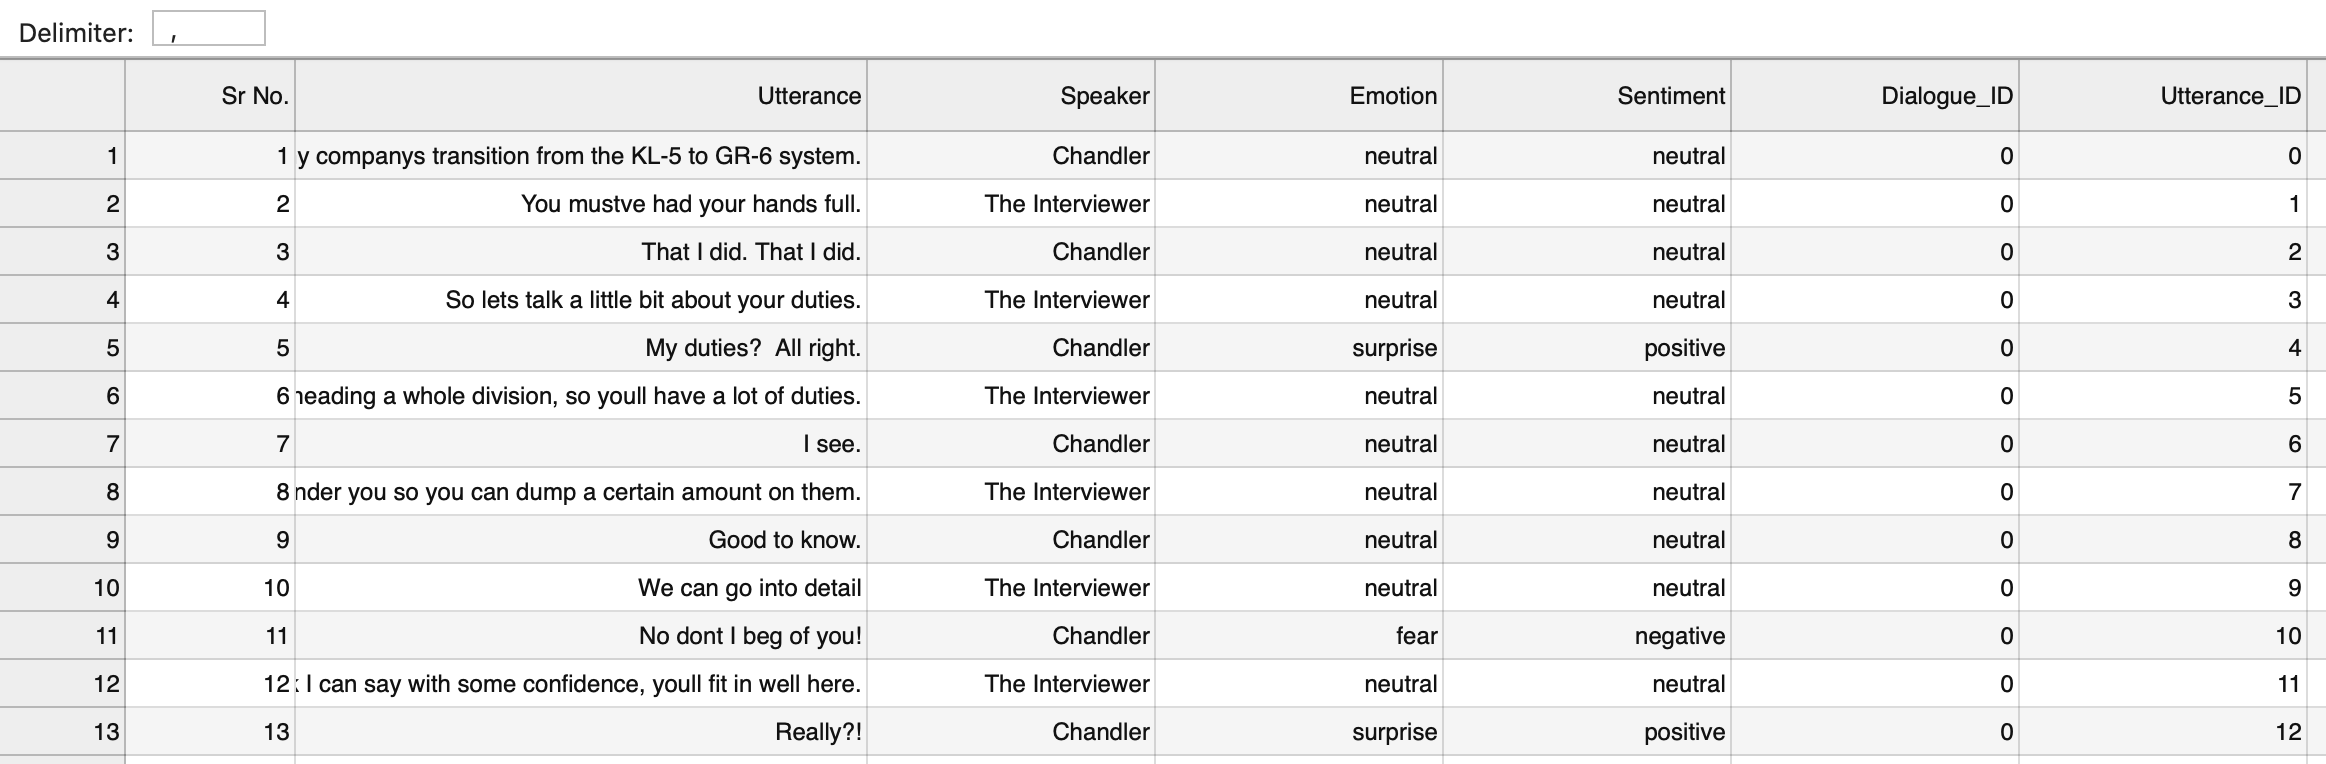

The first line shows the header. You see that the rows and columns are indeed separated by the delimiter ",". You can scroll through the table as in a file editor or spread sheet. CSV files can also be opened in other programs such as Excel and you can save excel files to CSV.

Opening a CSV. file in a notebook is a nice way to quickly get an idea about the content. We can see that there is a column with the utterances and columns for the emotion and the sentiment as annotations. We want to use the utterances and emotion columns for training a classifier to detect the emotion in any utterance. There are other columns as well, but we will ignore these in this notebook.

## 2. Using Pandas to load data <a class="anchor" id ="section2"></a> 

Instead of opening the data file in another TAB in Jupyter notebook, we want to read the data from the file in *memory* in the current notebook and feed it to the learning machine. We could write Python code to read the CSV file line by line and parse the columns to get the data. However, there is a powerful package for loading data called `Pandas`  https://pandas.pydata.org, which we are going to use instead.

Note that Pandas can be tricky when loading your own data. Be aware of that. Eventually, you may want to follow a tutorial on the web on how to use Pandas but for now you can simply follow the instructions below.

Pandas needs to be installed separately on your local machine first. As with other packages, make sure you install it within the same environment that you use to run this notebook or install it within this notebook through the next cell. Please install pandas locally from the command line, using either of the two following instructions:

* >`conda install pandas`
* >`python -m pip install --upgrade pandas`


In [2]:
#%pip install pandas

If the installation was succesful, you can now import 'pandas' in this notebook. If Jupyter notebook does not know 'pandas', try restarting the kernel or even restarting Jupyter.

In [3]:
import pandas as pd

If there is no error, you imported pandas and created the instantiation 'pd'. We can now use 'pandas' functions and data elements through the variable 'pd'. Take your time to study the next bit of code so that you understand the individual steps.
 
Our input file is located in the 'data/MELD' folder within this lab folder. We could set the path to the training file directly using the relative path:

```
#Path to the training data
filepath = './data/MELD/train_sent_emo.csv'
```

However, there can be issues if you are running the notebook somewhere else. So we can use the same code as from the previous notebook to find the current working directory

We can therefore define the path to this file relative to this notebook. 

In [4]:
import pathlib
current_working_directory = pathlib.Path.cwd()
print('current_working_directory', current_working_directory)
filepath = current_working_directory.joinpath('data/MELD/train_sent_emo.csv')
print('path:', filepath)
print('this will print True if the folder exists:', 
      filepath.exists())

current_working_directory /Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/lab3.machine_learning
path: /Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/lab3.machine_learning/data/MELD/train_sent_emo.csv
this will print True if the folder exists: True


Next, we use the 'pd.read_csv' function to read the data from the file. This read function returns a so-called **Dataframe** object, which is the object that holds all the data in memory for further processing. We are going to assign this object as a value to the variable `dftrain`.

In [5]:
# Create a dataframe object 'dftrain' by readig the file.
dftrain = pd.read_csv(filepath)

There are no error messages when reading the csv so the dataframe ```dftrain``` was succesfully created.

There are two useful functions to inspect data in a dataframe. The 'dftrain.info()' function gives us a technical overview of all the data, showing the column names and order, the number of cells with values per column (non-null) and the data type per column.

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


There are 9,989 indexed rows (entries) in our data frame and all cells have values (non-null). We also see the list of column headers and their data type.

We can now use 'dftrain.head()' function to show the content for the ''head'' of the table. You can pass in a number for the range of rows you want to see. Here we look at the first ten.

In [7]:
dftrain.head(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
5,6,"Now youll be heading a whole division, so you...",The Interviewer,neutral,neutral,0,5,8,21,"00:16:41,126","00:16:44,337"
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886"
7,8,But therell be perhaps 30 people under you so...,The Interviewer,neutral,neutral,0,7,8,21,"00:16:48,800","00:16:54,514"
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478"
9,10,We can go into detail,The Interviewer,neutral,neutral,0,9,8,21,"00:17:00,478","00:17:02,719"


In a similar way, we can also inspect the tail.

In [8]:
dftrain.tail(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
9979,10469,How many perfectly fine women are you gonna re...,Monica,surprise,negative,1038,8,2,3,"00:00:28,319","00:00:32,573"
9980,10470,"Hold it, hold it.",Joey,neutral,neutral,1038,9,2,3,"0:00:32,824","0:00:33,456"
9981,10471,I gotta side with Chandler on this one.,Joey,neutral,neutral,1038,10,2,3,"0:00:33,456","0:00:35,556"
9982,10472,"When I first moved to the city, I went out a c...",Joey,disgust,negative,1038,11,2,3,"00:00:35,744","00:00:44,334"
9983,10473,It made me nuts.,Joey,disgust,negative,1038,12,2,3,"00:00:45,462","00:00:46,587"
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"
9988,10478,"That was a good one. For a second there, I was...",Joey,joy,positive,1038,17,2,3,"00:01:08,401","00:01:12,071"


The MELD project also provides a test set, which has the same format as the training set. We are going to load this data as well in a different data frame with the name 'dftest'.

In [10]:
filepath = current_working_directory.joinpath('data/MELD/test_sent_emo.csv')
dftest = pd.read_csv(filepath)
dftest.info()
dftest.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"
5,21,"Push 'em out, push 'em out, harder, harder.",Joey,joy,positive,1,2,1,23,"00:10:46,979","00:10:50,148"
6,22,"Push 'em out, push 'em out, way out!",Joey,joy,positive,1,3,1,23,"00:10:50,316","00:10:52,609"
7,23,"Let's get that ball and really move, hey, hey,...",Joey,joy,positive,1,4,1,23,"00:10:52,777","00:10:55,612"
8,24,"Let's I was justyeah, right.",Joey,joy,positive,1,5,1,23,"00:10:55,780","00:11:01,242"
9,25,Push!,Joey,joy,positive,1,6,1,23,"0:11:01,410","0:11:01,828"


So there are 2,610 utterances in the test set.

It is always very important to analyse the data a bit more so that you know what you are dealing with. We will use some visualisation functions below to do so.

### Cleaning the data

As it happens, the MELD utterances have some problematic strings with encoding problems. You mave noticed these in the first ten rows of the test and train data above. If we print the first utterance see a '\x92' code in the popsition of a quote:

In [17]:
# We print out the first cell in the 'Utterance' column to inspect it.
dftrain['Utterance'][0]

"also I was the point person on my company's transition from the KL-5 to GR-6 system."

These code may break some of the function that we want to apply. To prevent that we are going to remove these from the utterances.
We created a special function that removes these codes.

In [18]:
# Fixing encoding problems and replacing the 'Utterance' columns with the cleaned strings
def replace_weird_tokens_in_meld(df):
    weird = ["\x92","\x97","\x91","\x93","\x94","\x85"]
    utts = []
    for utterance in df['Utterance']:
        for w in weird:
            utterance = utterance.replace(w, "'")
        utts.append(utterance)
    df['Utterance'] = utts

Now you can use this function ```replace_weird_tokens_in_meld``` to clean the texts in Utterances.

In [19]:
replace_weird_tokens_in_meld(dftrain)
replace_weird_tokens_in_meld(dftest)

In [21]:
# We print out the first cell in the 'Utterance' column to inspect it.
dftrain['Utterance'][0]

"also I was the point person on my company's transition from the KL-5 to GR-6 system."

This looks like a normal piece of text and also the head rows are not clean:.

In [22]:
dftrain.head(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company's tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must've had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let's talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
5,6,"Now you'll be heading a whole division, so you...",The Interviewer,neutral,neutral,0,5,8,21,"00:16:41,126","00:16:44,337"
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886"
7,8,But there'll be perhaps 30 people under you so...,The Interviewer,neutral,neutral,0,7,8,21,"00:16:48,800","00:16:54,514"
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478"
9,10,We can go into detail,The Interviewer,neutral,neutral,0,9,8,21,"00:17:00,478","00:17:02,719"


## 3. Visualising the data <a class="anchor" id ="section3"></a> 

There are many ways and packages for visualising data. Data visualisation is important because it may show **biases** or inspire **baseline** approaches. Data **biases** can make your system overfit to certain dominant classes and make it hard to detect rare cases. A **baseline** system is a solid and simple approach against which you want to compare your trained system. Typical baselines are:  assign **random classes** as output or always assign the most dominant **majority class**. Let's see what the majority class is in our data. Don't worry too much understanding the next code as long as you can use it.

To visualise data distributions, we use the **seaborn** package: https://seaborn.pydata.org/index.html

Seaborn can do fancy data visualisations. Checkout the website to learn more.
For now, we will use a simple function that you can apply to a column in a Pandas dataframe.

First, you need to install the package:

In [24]:
#!pip install seaborn

If the installation is succesful, we can import it in this notebook as**sns**.

In [25]:
import seaborn as sns

Seaborn can create a figure directly from a column in a Pandas dataframe using the **countplot** function:

<Axes: xlabel='Emotion', ylabel='count'>

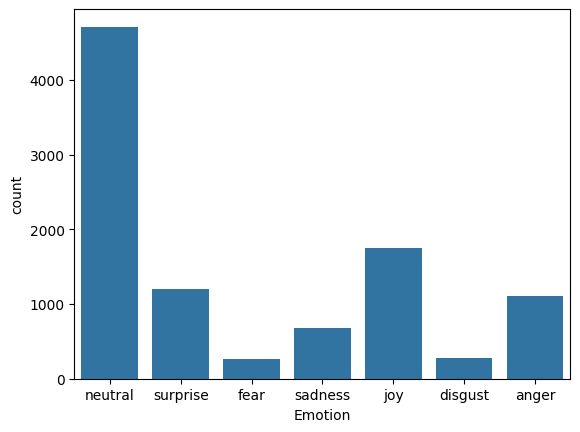

In [26]:
sns.countplot(x=dftrain['Emotion'])

This figure is rather basic. We do not see the totals of each category and need to guess the counts by eye-balling it. Furthermore, we also want to get the proportions for these labels.

To add more information to the figure, we will use another package called **matplotlib**. There are many options and functions you can use to modify and adapt plots using **matplotlib**. We will show only a few here. You can read more about setting parameters for plotting figures here: https://matplotlib.org/stable/tutorials/introductory/customizing.html 

We install **matplotlib** in the usual way if you have not done so before.

In [27]:
#%conda install matplotlib

#or

#pip install matplotlib

After succesful installation, we can import it as 'plt': 

In [28]:
import matplotlib.pyplot as plt

We need some code to first count how frequently emotion labels are assigned and next get their proportional values. First, we can get the counts for the Emotion values from the corresponding Pandas column. For this we use the **Counter** function of Python. This gives a dictionary with the values and their counts. From this dictionary we can get all the keys and values as lists.  The **Counter** class creates a dictionary with the keys in random order. We use another function **OrderedDict** to sort the keys alphabetically.

In [29]:
from collections import Counter, OrderedDict
counts = Counter(dftrain['Emotion'])
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
print(labels, values)

OrderedDict([('anger', 1109), ('disgust', 271), ('fear', 268), ('joy', 1743), ('neutral', 4710), ('sadness', 683), ('surprise', 1205)])
['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'] [1109, 271, 268, 1743, 4710, 683, 1205]


To make things easier, we defined a function called **plot_labels_with_counts** that takes the labels and values and plots them as bars using **Seaborn** while augmenting the bars with the proportion out of the total. We added this function to the **lab3_util.py** file that you need to import as **util**, so you can call it using **util.plot_labels_with_counts**.

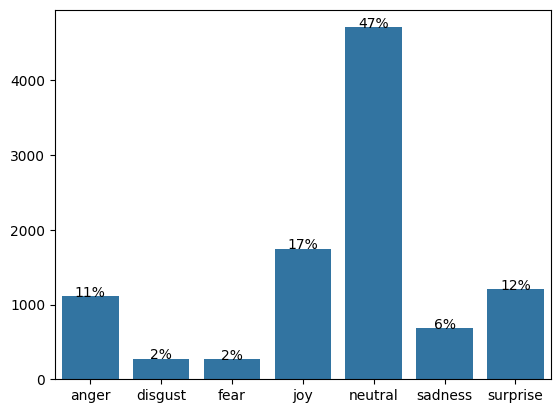

In [31]:
import lab3_util as util
util.plot_labels_with_counts(labels, values)

Now, we have the proportions on top of the bars. We clearly see that the emotions are not equally distributed over the utterances. Most utterances are `neutral` (47%) and `fear` and `disgust` are rare. It is important to realize this when training and testing the classifier.

On the basis of the stats for the emotion values, we can already have expectations for what a machine will learn from this data: **assign the class neutral!**

A possible majority class baseline would be to always assign `neutral`. We will try that below.

Let us see if the test data has a similar distribution:

OrderedDict([('anger', 345), ('disgust', 68), ('fear', 50), ('joy', 402), ('neutral', 1256), ('sadness', 208), ('surprise', 281)])


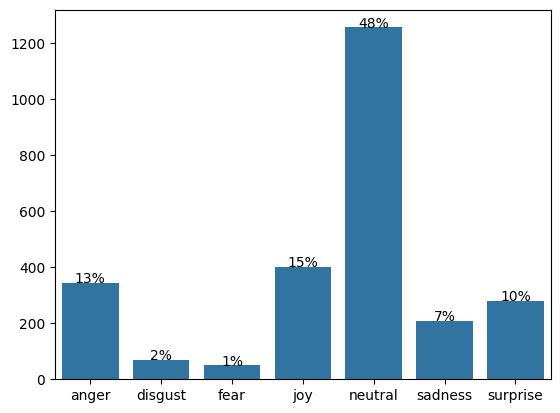

In [32]:
counts = Counter(dftest['Emotion'])
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
util.plot_labels_with_counts(labels, values)

We see that the test data is similar in terms of the distribution of emotions. This means that statistical expectations learned from the training data will be relevant for the test data. A ```neutral``` baseline always assigns the class neutral and will be correct in 48% of the cases.

Think about this for a moment. Is this good or bad? For science or for applications?

We want to build a model that performs better than this baseline. Anything performing at this level or lower did not learn much or the wrong things.

In order to train a model to test against the baseline, we need to get all the utterances and the corresponding labels. For this we need to iterate over the Pandas data frame. The next section shows how we can do that.


## 4. Representing the texts as Bag-of-Words <a class="anchor" id ="section4"></a> 

To train our classifier, we are going to import the *sklearn* and *numpy* packages as we did in the previous notebook. We are also going to filter the text for stopwords using *NLTK*. 

In [33]:
import sklearn
import numpy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

To get the training texts and the corresponding labels, we can simple assign the complete Pandas columns `Utterances` and `Emotion` to two variables.

In [34]:
training_instances=dftrain['Utterance']
training_labels=dftrain['Emotion']
print(len(training_instances))
print(len(training_labels))

9989
9989


Obviously, the lists of texts and labels should be of the same length and in the same order.

The text and the label for the 11th utterance: *training_instances[10]* can now be retrieved from the list of labels:

In [35]:
print('Utterance:', training_instances[10], 'Emotion label:', training_labels[10])

Utterance: No don't I beg of you! Emotion label: fear


In a similar way, we get the test data from the test dataframe.

In [36]:
test_instances = dftest['Utterance']
test_labels = dftest['Emotion']

print(test_instances[10], test_labels[10])
print(len(test_instances))
print(len(test_labels))

Push! joy
2610
2610


### 4.1 Representing the training text as numerical vectors <a class="anchor" id ="section4.1"></a> 

*Machines don't like words, they prefer numbers.*

We use the **CountVectorizer** function to create a numerical Bag-of-Words representation for each utterance, given the words that occur in all utterances.

There are a few parameters that can be set for the CountVectorizer function to determine the words that are represented in the vector. The most important ones are:

* how often does the word occur in the data set
* how to split the text into separate words
* which stop words need to be excluded

Below, we set the minimal frequency to '5', so we ignore words occurring less frequently. We als ignore stopwords as defined by the NLTK library. Finally, we use NLTK to split the text into a list of tokens.

To get an idea what these parameters do, you can experiment with the values and check the effect. This is different for each data set.

In [37]:
# Turn utterances train data into a vector 
frequency_threshold = 5
utterance_vec =CountVectorizer(min_df=frequency_threshold, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english')) # stopwords are removed


Do you always want to remove stopwords? Perhaps not. Stopwords are very frequent words in a language, such as "I", "you", "not". They have little content but they could be very important for understanding the emotion expressed in a text. Check the stopwords to see if removing these is useful.

In [38]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Following your intuition, you can decide to not use stopwords (remove the parameter from the function call) or to adapt the stopword list. You can build different classifiers with different settings and see if their performance differs.

We now created an instance of the CountVectorizer *utterance_vec* with the settings as defined. We can now call the functions of CountVectorizer on this instance. The *fit_transform* function will do two things:

<ol>
<li> it will create a dictionary with all unique tokenized words that fit the settings and generate a vector with the length equal to the number of words, such that each position corresponds with one of these words
<li> it will transform each utterance into a bag-of-words vector representation by counting how frequent each word occurs in the utterance
</ol>


In [39]:
training_count_vectors = utterance_vec.fit_transform(training_instances)

/Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


We have now created a vector representation *training_count_vectors* of the vocabulary of the full data set for words occurring 5 times or more. Every position in this vector represents a unique word token.

In [40]:
#Total number of word features or the length of the total vector
print(len(utterance_vec.vocabulary_))

1103


The length of the *vocabulary_* property indicates the length of the lexicon and therefore the length of the vectors or the number of feature dimensions.

We can get the *names* of the positions in the vector using the function *get_feature_names*. Below we show the first 50 names.

Our data is a list of vectors which represents a matrix with the text vectors on each row. Using *shape*, we can get the dimensions of the matrix:

In [41]:
print(training_count_vectors.shape)
print(training_count_vectors.toarray()[0][:50]) ### showing the values for the first 50 dimensions of the first utterance

(9989, 1103)
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
# this vector is small enough to view in full! 
print('The vocabulary of all the sentences  consists of the following words:', 
      list(utterance_vec.vocabulary_.keys()))
print('These words are mapped to the data columns as feature names:', 
      utterance_vec.get_feature_names_out())

The vocabulary of all the sentences  consists of the following words: ['also', 'point', 'person', 'company', "'s", 'system', '.', 'must', "'ve", 'hands', 'full', 'let', 'talk', 'little', 'bit', '?', 'right', "'ll", 'whole', ',', 'lot', 'see', '30', 'people', 'dump', 'good', 'know', 'go', "n't", '!', 'answer', 'think', 'say', 'well', 'really', 'absolutely', 'relax', 'went', 'last', 'month', 'forget', 'no-no-no-no', 'talking', 'i-i-i-i', 'actually', 'ok', '...', 'yeah', 'sure', 'hey', 'mon', 'wan', 'na', 'hear', 'something', 'sucks', 'ever', 'says', "'re", 'bar', 'way', 'apparently', 'kinda', 'coffee', 'place', 'gon', 'hang', 'got', 'get', 'pick', 'roommate', 'italian', 'guy', 'oh', 'god', 'monica', 'wrote', 'look', 'empty', 'nothing', 'inside', 'seem', 'still', "'", 'thinks', 'totally', 'happy', 'done', 'hi', 'ah', "y'know", 'building', 'paper', 'route', "'d", 'woman', 'pretty', 'tough', 'thank', 'mark', 'started', 'fall', 'line', 'would', 'shut', "'m", 'proud', 'listen', 'sorry', 'craz

This means we have a list of *9,989* vectors, each with the length of the size of the vocabulary, if the threshold is set to frequency 5 and you remove stopwords it will be *1103* positions. If you did NOT remove the stopwords this is *1217* positions for words. If you change the frequency threshold the number of columns changes again.

As we have seen in the previous notebooks, we can also transform the counts into information value scores using the *TfidfTransformer* function.

###IMPORTANT
For the training data we use the **fit_transform** function but for the test data we use the **transform** function. Do you remember why?

The shape remains the same but the values are now scores between zero and one that indicate the information value of each word given the dispersion over all the data.

In [43]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()

#### For training data we use fit_transform
training_tfidf_vectors = tfidf_transformer.fit_transform(training_count_vectors)

In [44]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
print(training_tfidf_vectors.shape)
print(training_tfidf_vectors.toarray()[0][:50]) ### showing the values for the first 50 dimensions

(9989, 1103)
[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.160412  0.        0.
 0.        0.        0.0910211 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.       ]


We see that the non-zero values are now differentiated into real numbers or floats that represent not only presence but also the information value of the word.

Think about these values for this data set. The texts are short and there may not be a topical distribution for these utterances. Is *TF.IDF* really useful for this data set and for capturing emotions?

### 4.1 Representing the test text as numerical vectors <a class="anchor" id ="section4.2"></a> 

We presented the training data as Bag-of-Word vectors but now we also need to  fit the test data to this Bag-of-Word model. Note that the representation of the test data needs to be compatible with the training data. To ensure this we use the vectorizer created from the training data to also represent the test data.

Instead of *fit_transform*, we need to use the function *transform* from ```utterance_vec```. The *transform* function will represent the text according to the vector model of the training data and ignore all out-of-vocabulary words in the test texts. 

In [45]:
test_count_vectors = utterance_vec.transform(test_instances)
print(test_count_vectors.shape)
print(test_instances[0])
print(test_count_vectors.toarray()[0][:50])

(2610, 1103)
Why do all you're coffee mugs have numbers on the bottom?
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


We can see that the test data has vectors of the same length with many zeros and a few positions scored with one. There are as many vectors as test utterances.

We can use the same tfidf_transformer we used before to turn the count vectors into weighted vectors:

In [46]:
test_tfidf_vectors = tfidf_transformer.transform(test_count_vectors)

In [47]:
print(test_tfidf_vectors.toarray()[0][:50])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.48498825 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.28648314 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


## 5 Training and evaluating the classifier <a class="anchor" id ="section5"></a> 

We can now use the above text representations as training data to build a classifier. In the previous notebook, we used a NaiveBayes classifier. In this note book we are going to use a Support Vector Machine or SVM. This is a more sophisticated classifier that belongs to the family of discriminative models. This means it learns a weight for each feature (in our case words) to predict the right class (in our case an emotion). SVMs typically try to find the right separation between negative and positive examples for the feauture words by adjusting the weights: all wrong ones on one side and right ones on the other side. You can check out another tutorial for more information: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In NLP, SVM classifiers have shown to perform very well for many tasks if you have a substantial amount of data.

We import svm from sklearn and select a **LinearSVC** type, which is a standard model. We also set a maximum to the number of iterations it should make over the training data when trying to learn sufficiently discriminative features. We use the **fit** funcion to pass in the training data and the corresponding list of labels.

In [48]:
from sklearn import svm
svm_linear_clf = svm.LinearSVC(max_iter=2000)
svm_linear_clf.fit(training_tfidf_vectors, training_labels)

LinearSVC(max_iter=2000)

### 5.1 Evaluating the performance of the classifier on the test data<a class="anchor" id ="section5.1"></a> 

We apply the classifier to the test data to get the predictions. We generate a classification report and a confusion matrix to analyse the performance.

In [49]:
# Predicting the Test set results, find macro recall
y_pred_svm = svm_linear_clf.predict(test_tfidf_vectors)
print('First ten predictions from the SVM classifier', y_pred_svm[0:10])

First ten predictions from the SVM classifier ['neutral' 'neutral' 'neutral' 'neutral' 'joy' 'neutral' 'neutral'
 'neutral' 'neutral' 'joy']


In [50]:
from sklearn.metrics import classification_report
report = classification_report(test_labels,y_pred_svm,digits = 7, target_names = svm_linear_clf.classes_)
print('BoW TFIDF SVM LINEAR ----------------------------------------------------------------')
print('Word frequency threshold', frequency_threshold)

print(report)

BoW TFIDF SVM LINEAR ----------------------------------------------------------------
Word frequency threshold 5
              precision    recall  f1-score   support

       anger  0.4333333 0.1884058 0.2626263       345
     disgust  0.2000000 0.0294118 0.0512821        68
        fear  0.1666667 0.0200000 0.0357143        50
         joy  0.4369159 0.4651741 0.4506024       402
     neutral  0.6398104 0.8598726 0.7336957      1256
     sadness  0.3389831 0.0961538 0.1498127       208
    surprise  0.4869888 0.4661922 0.4763636       281

    accuracy                      0.5693487      2610
   macro avg  0.3860997 0.3036015 0.3085853      2610
weighted avg  0.5203171 0.5693487 0.5224376      2610



In the classification report we see the precision, recall and f1-score for each label and averaged scores: accuracy, macro avg and weighted (or micro) average. Also note the support column that indicates how many test cases there are in each category and in total. There are a lot more test cases with `neutral` than for the other emotions.

We can see that the performance varies a lot across the emotions. The results for `neutral` are a lot better in precision and recall than the other emotions: `joy` and `surprise` have reasonable scores but the others have very low recall and `disgust` and `fear` also low precision. Overall macro average f1-score is 0.3 which is lower than the majority baseline of 0.48 when always choosing `neutral`. The weighted f1-score, in which the proportion of test cases per catgory is used to weigh the results, is just above the baseline. The higher support for neutral means it dominates both in the training data and in the test. If we would create a more-balanced test set, the macro-average score is expected to be a lot lower. Can you explain why?

Sklearn can also generate a confusion matrix, which indicates which classes are confused with which other classes (false positives). For this we use the function ```metrics.confusion_matrix```. We visualise it using ```ConfusionMatrixDisplay``` that we need to import separately.

Confusion matrix SVM
['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
[[  65    2    0   78  162    3   35]
 [   5    2    1    8   42    2    8]
 [   4    1    1    9   25    4    6]
 [  20    2    2  187  156    5   30]
 [  27    3    2   74 1080   20   50]
 [  16    0    0   27  136   20    9]
 [  13    0    0   45   87    5  131]]


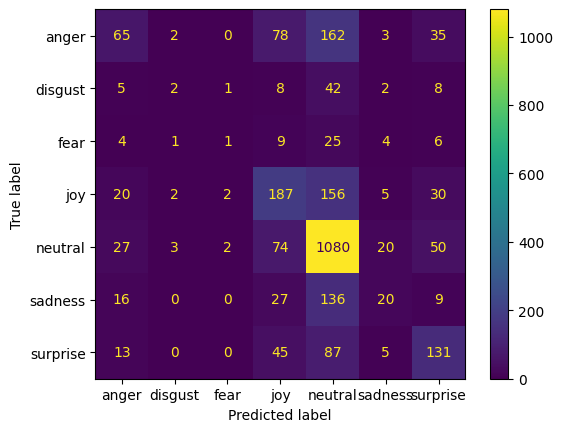

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion matrix SVM')
print(svm_linear_clf.classes_)
cf_matrix_svm = sklearn.metrics.confusion_matrix(test_labels,y_pred_svm)
print(cf_matrix_svm)
import matplotlib.pyplot as plt
display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_svm, display_labels=svm_linear_clf.classes_)
display.plot()

The diagonals represent the correctly classified test utterances. All others indicate the confusions, where another class was wrongly assigned. It is clear the neutral column has most results not only for the True label neutral but also the other rows. Besides the dominance of `neutral`, we see that `anger` spills a bit into `joy`, `sadness` and `neutral`. Furthermore, note that `surprise` is confused with both `anger` and `joy`. This makes sense because you can be surprised in a positive and negative way. Think a minute how the sentiment labels in MELD may help here. How would you fix this?  

### 5.2 Balancing training data <a class="anchor" id ="section5.2"></a> 

Our system performs just above the baseline of the dominant class *neutral*: .48. What can you do if one class is so dominant?

Well, we can simply reduce the training data for the dominant class. The next code iterates over the rows in the dataframe and separately gets the utterance and label. To get the label that goes with the utterance, we need to pass the row index that goes with each utterance in the **iloc** function of the Emotion column. We use a general Python **enumerate** function to simultaneously get the utterance and the row index from the list of utterances in the Utterance column.

In [52]:
## With sample we define how many training cases we want to skip to select the next training item
## If set to 5 we take 1 out of 5
sample = 5

balanced_training_instances=[]
balanced_training_labels=[]

cnt_neutral = 0
for row_nr, utterance in enumerate(dftrain['Utterance']):
    emotion_label = dftrain['Emotion'].iloc[row_nr] # this reads as from the column 'Emotion' take the value from the row located at 'row_nr'
    if emotion_label =='neutral':
        cnt_neutral += 1
        if cnt_neutral % sample == 0:  ### this checks if the count is dividable by the value of sample (no leftover)
            balanced_training_instances.append(utterance)
            balanced_training_labels.append(emotion_label)
    else:
        balanced_training_instances.append(utterance)
        balanced_training_labels.append(emotion_label)

In [53]:
balanced_df = pd.DataFrame(balanced_training_labels, columns = ['Emotion'])
print(balanced_df.info())
print(balanced_df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6221 entries, 0 to 6220
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  6221 non-null   object
dtypes: object(1)
memory usage: 48.7+ KB
None
     Emotion
0   surprise
1    neutral
2       fear
3    neutral
4   surprise
5   surprise
6    sadness
7   surprise
8       fear
9    neutral
10       joy
11   sadness
12  surprise
13   disgust
14   sadness


['joy', 'surprise', 'anger', 'neutral', 'sadness', 'disgust', 'fear'] [1743, 1205, 1109, 942, 683, 271, 268]


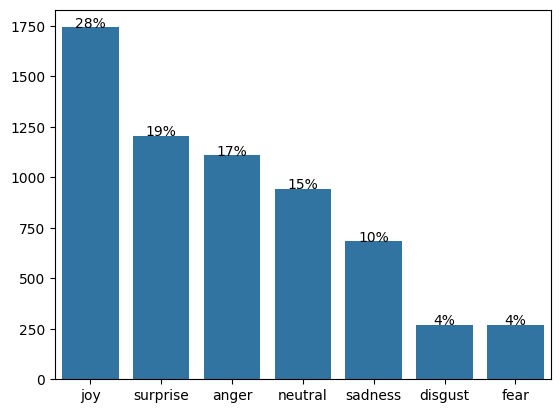

In [54]:
counts = balanced_df.Emotion.value_counts()
labels = counts.index.to_list()
values = counts.to_list()
print(labels, values)
util.plot_labels_with_counts(labels, values)

Will this work? Figure it out your self by retraining and testing a classifier.

## 6. Saving and reusing your classifier in another program <a class="anchor" id ="section6"></a> 

When we are happy about our classifier, we may want to save it so that we can use it in another notebook or program. Python provides a package called *pickle* with which you can save what is in memory (our model) to a file on disk as so-called binary data. You can then load this file at a later point to use it in your code. 

Let's see how that works for our classifier by saving it in the subfolder "models". Remember you need to have a folder in this lab called models. If not create it first before running the next code.

We will save three things:

* the vectorizer so that we can represent other texts using the vector model
* the tfidf transformer so we can convert the counts in our text to TFIDF values
* the actual sklearn classifier that we created


In [55]:
import pickle

# save the countvectorizer
filename_vectorizer = './models/utterance_vectorizer.sav'
pickle.dump(utterance_vec, open(filename_vectorizer, 'wb'))

# save the tfidf transformer
filename_tfidftransformer = './models/utterance_tfidf_transformer.sav'
pickle.dump(tfidf_transformer, open(filename_tfidftransformer, 'wb'))

# save the classifier to disk
filename_classifier = './models/svm_linear_clf_bow.sav'
pickle.dump(svm_linear_clf, open(filename_classifier, 'wb'))

Now check your *models* folder to see the four data files that you saved. You could now save and stop this notebook and use these classifiers some other time. We next show how to load them again to classify some text.

In [56]:

# some time later...
 
# load the classifier and the vectorizer from disk
loaded_classifier = pickle.load(open(filename_classifier, 'rb'))
loaded_vectorizer = pickle.load(open(filename_vectorizer, 'rb'))
loaded_tfidftransformer = pickle.load(open(filename_tfidftransformer, 'rb'))


We now use the loaded versions to represent and classify the next chats.

In [57]:
# some utterances
some_chat = ['That is sweet of you', 
               'You are so funny', 
               'Are you a man or a woman?', 
               'Chatbots make me sad and feel lonely.', 
               'Your are stupid and boring.', 
               'Two thumbs up', 
               'I fell asleep halfway through this conversation', 
               'Wow, I am really amazed.', 
               'You are amazing.',
             'I feel so low being in isolation',
             'People dumping waste are horrible',
             'Its awful that you cannot stop smoking',
             'Dogs scare me',
             'I am afraid I will get sick at work',
             'I run away when I see a dog',
             'When do you start your job?'
            ]
some_chat_gold = ['joy', 'joy', 'neutral', 'sadness', 'anger', 'joy', 'anger', 'surprise', 'joy', 'sadness', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'neutral']

print(len(some_chat), len(some_chat_gold))

16 16


In [58]:
new_counts = loaded_vectorizer.transform(some_chat)
some_chat_tfidf = loaded_tfidftransformer.transform(new_counts)
some_chat_tfidf.shape

/Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


(16, 1103)

In [59]:
some_chat_pred = loaded_classifier.predict(some_chat_tfidf)
for review, predicted_label in zip(some_chat, some_chat_pred):
    print('%s => %s' % (review, predicted_label))

That is sweet of you => joy
You are so funny => neutral
Are you a man or a woman? => neutral
Chatbots make me sad and feel lonely. => sadness
Your are stupid and boring. => anger
Two thumbs up => neutral
I fell asleep halfway through this conversation => neutral
Wow, I am really amazed. => surprise
You are amazing. => joy
I feel so low being in isolation => neutral
People dumping waste are horrible => neutral
Its awful that you cannot stop smoking => neutral
Dogs scare me => neutral
I am afraid I will get sick at work => neutral
I run away when I see a dog => neutral
When do you start your job? => neutral


In [60]:
report = classification_report(some_chat_gold,some_chat_pred,digits = 7)
print('BOW SVM LINEAR ----------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)
print(report)

BOW SVM LINEAR ----------------------------------------------------------------
Word freqeuncy threshold 5
              precision    recall  f1-score   support

       anger  1.0000000 0.5000000 0.6666667         2
     disgust  0.0000000 0.0000000 0.0000000         2
        fear  0.0000000 0.0000000 0.0000000         3
         joy  1.0000000 0.5000000 0.6666667         4
     neutral  0.1818182 1.0000000 0.3076923         2
     sadness  1.0000000 0.5000000 0.6666667         2
    surprise  1.0000000 1.0000000 1.0000000         1

    accuracy                      0.4375000        16
   macro avg  0.5974026 0.5000000 0.4725275        16
weighted avg  0.5852273 0.4375000 0.4342949        16



/Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/piek/Desktop/t-MA-HLT-introduction-2024/ma-hlt-labs/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

# End of this notebook